In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('car_evaluation.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


# EDA

In [4]:
df.shape

(1727, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
df.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


<AxesSubplot:>

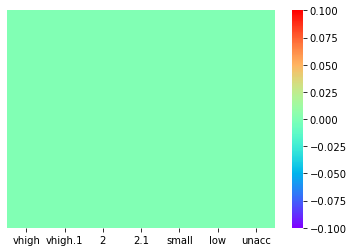

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='rainbow')

In [8]:
col_name = ['buying','maint','doors','persons','lug_boot','safety','class']
df.columns = col_name
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [12]:
df.shape

(1727, 7)

In [11]:
for i in df.columns:
    print(df[i].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


# Feature Engineering

In [15]:
!pip install category_encoders

In [16]:
import category_encoders as cate

In [21]:
encode = cate.OrdinalEncoder(cols = ['buying','maint','doors','persons','lug_boot','safety','class'])
df = encode.fit_transform(df)

In [22]:
for i in df.columns:
    print(df[i].value_counts())

2    432
3    432
4    432
1    431
Name: buying, dtype: int64
2    432
3    432
4    432
1    431
Name: maint, dtype: int64
2    432
3    432
4    432
1    431
Name: doors, dtype: int64
2    576
3    576
1    575
Name: persons, dtype: int64
2    576
3    576
1    575
Name: lug_boot, dtype: int64
1    576
2    576
3    575
Name: safety, dtype: int64
1    1209
2     384
4      69
3      65
Name: class, dtype: int64


# Separate Dataset

In [23]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1:]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(X_train,Y_train)
y_pred = rf.predict(X_test)

C:\Users\durat\AppData\Local\Temp/ipykernel_37284/3248010367.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_train)


In [29]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
print(accuracy_score(Y_test,y_pred))
cm = confusion_matrix(Y_test,y_pred,labels=rf.classes_)
print(classification_report(Y_test,y_pred))

0.9682080924855492
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       237
           2       0.94      0.97      0.96        77
           3       0.75      0.71      0.73        17
           4       0.85      0.73      0.79        15

    accuracy                           0.97       346
   macro avg       0.88      0.85      0.87       346
weighted avg       0.97      0.97      0.97       346

